In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import joblib
import seaborn as sns

In [44]:
# importing the data
data = pd.read_csv('bidadata.csv')

In [45]:
# getting the dimensions of the data set
data.shape

(614, 13)

In [46]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


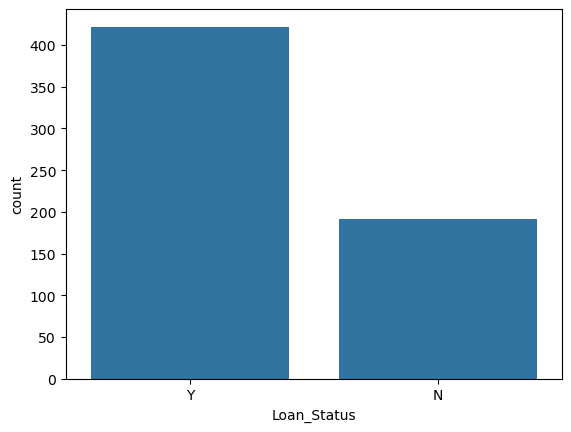

In [47]:
sns.countplot(x='Loan_Status', data=data)
plt.show()

Text(0, 0.5, 'Proportion of Applicants')

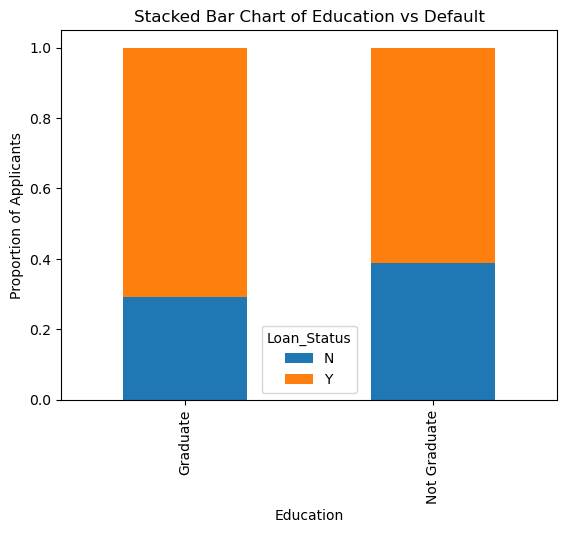

In [48]:
table=pd.crosstab(data.Education,data.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Default')
plt.xlabel('Education')
plt.ylabel('Proportion of Applicants')
# plt.savefig('education_vs_def_stack')

Text(0, 0.5, 'Proportion of Applicants')

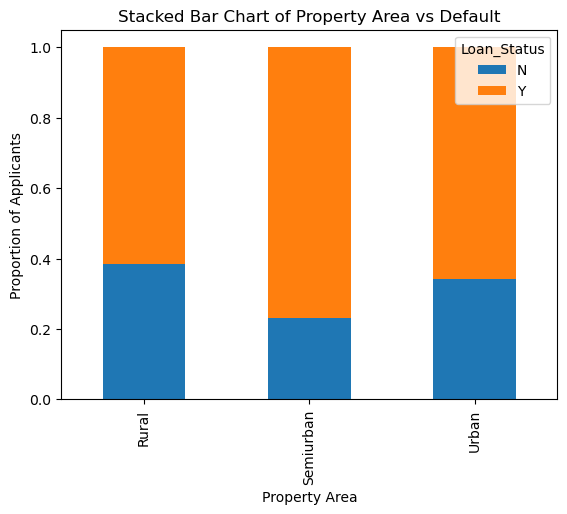

In [49]:
table=pd.crosstab(data.Property_Area,data.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Property Area vs Default')
plt.xlabel('Property Area')
plt.ylabel('Proportion of Applicants')
# plt.savefig('propery_area_vs_def_stack')

Text(0, 0.5, 'Proportion of Applicants')

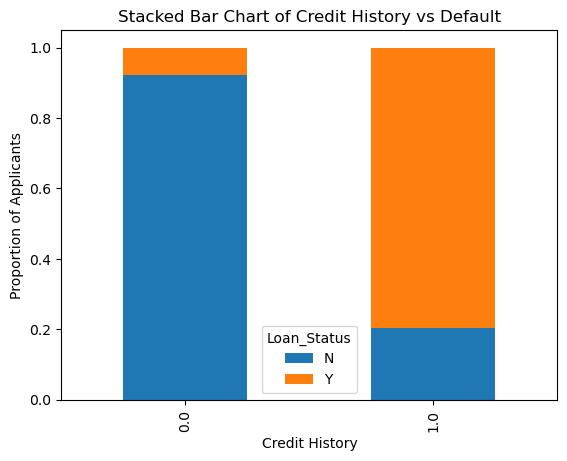

In [50]:
table=pd.crosstab(data.Credit_History,data.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Credit History vs Default')
plt.xlabel('Credit History')
plt.ylabel('Proportion of Applicants')
# plt.savefig('credit_history_vs_def_stack')

In [51]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [52]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [53]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [54]:
# dropping the Loan_ID column
data = data.drop(['Loan_ID'], axis=1)

In [55]:
# getting the number of null values in each column
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
# filling in the null values with the mode of each column
for column in data.columns:
    data[column] = data[column].fillna(data[column].mode().iloc[0])

In [59]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [60]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
# selecting the features to be used in the logistic regression model
X = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

In [62]:
# converting categorical data to numerical data for use in the model
# using LabelEncoder
encoders = {}
for column in ['Gender', 'Married', 'Dependents',
                'Education', 'Self_Employed', 'Property_Area']:
    categorical_convert = LabelEncoder()
    X[column] = categorical_convert.fit_transform(X[column])
    encoders[column] = categorical_convert

In [63]:
categorical_convert = LabelEncoder()
y = categorical_convert.fit_transform(y)

In [64]:
# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [65]:
# defining the Logistic Regression model
model = LogisticRegression(max_iter=10000)

In [66]:
model

LogisticRegression(max_iter=10000)

In [67]:
# fitting data
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [68]:
# saving the model using joblib
# to deploy using Django
filename = 'logreg.sav'
log_model = joblib.dump(model, filename)

In [69]:
# using test set to make predictions
y_pred = model.predict(X_test)

In [70]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [71]:
# printing out a confusion matrix 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15, 18],
       [ 2, 88]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

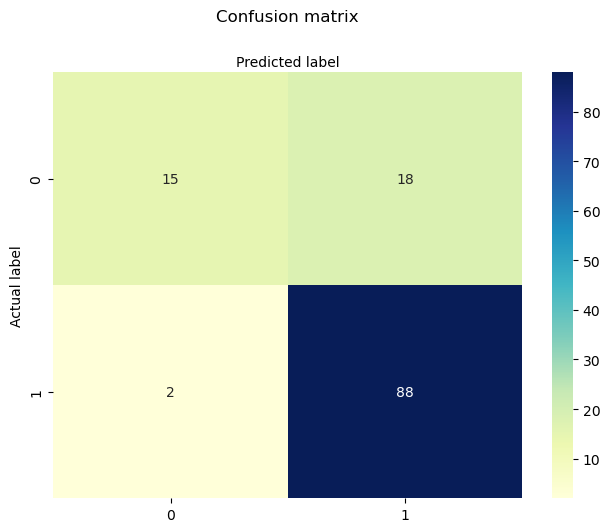

In [72]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [73]:
# getting model accuracy
model.score(X_test, y_test) * 100

83.73983739837398